# Password Strength Classifier

Here in the datasets we will be having a varioid passwords and their strength and we need to classify and predict the strength of the given password , either strong, weak or average

For Password Strength Classifier we will use 3 algorithms:

1.Linear Regression

2.Ridge Regression

3.Decision Tree Regressor

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

### Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Preparation

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

## **Data Exploration**

In [2]:
#  first we need to read the data from data.csv file, therefore we need to import the basic python library
import pandas as pd
import numpy as np
import seaborn as sns # we can also use matplotlib for visulaization purpose
import warnings  # to get rid of all the warnings that come across the cell, we import warnings
warnings.filterwarnings('ignore')

### 

In [70]:
# READING THE DATASETS
data=pd.read_csv('../Dataset/data.csv',error_bad_lines=False)# read the data using read_csv function and setting the value of error_bad_lines = false, because it is by default true
data.head()

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


## **Data Preparation**

In [6]:
data['strength'].unique() #Checking the unique strength present in dataset, 0-poor, 1 for average, 2 for best

array([1, 2, 0], dtype=int64)

In [7]:
# CHECKING ALL THE MISSING VALUES IN DATASET AND DROPPOING THEM ALL
data.isna().sum() # checking is there any Nan value in data, here only one value

password    1
strength    0
dtype: int64

In [8]:
data[data['password'].isnull()] # finding the position where it is Nan

,password,strength
367579,NaN,0


In [9]:
data.dropna(inplace=True) # dropping that data

In [10]:
data.isnull().sum() # after dropping , checking if there is not any Nan value, here 0

password    0
strength    0
dtype: int64

## **Data Visualization**

<AxesSubplot:xlabel='strength', ylabel='count'>

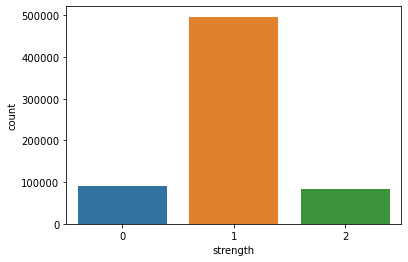

In [11]:
sns.countplot(data['strength']) # checking the freq of each category of strength

In [12]:
password_tuple=np.array(data) # now we create an array containing all the data of the dataset

In [13]:
password_tuple # printing that array 

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [14]:
# shuffling the data to create the robustness
import random # therefore importing random
random.shuffle(password_tuple) # using shuffle function make the array shuffled
password_tuple # printing the array after shuffling

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['duong12', 0],
       ['tendy1992', 1],
       ['vikramvicky16', 1]], dtype=object)

In [15]:
# code for list comprehension
# first column is put in x list
# ans 2nd column in y list
x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]

In [16]:
x # printing x list

['kzde5577',
 'kino3434',
 'visi7k1yr',
 'kino3434',
 'visi7k1yr',
 'megzy123',
 'u6c8vhow',
 'v1118714',
 'v1118714',
 'megzy123',
 'kzde5577',
 'u6c8vhow',
 'universe2908',
 'v1118714',
 'asv5o9yu',
 'universe2908',
 'jerusalem393',
 '612035180tok',
 'idofo673',
 'sbl571017',
 'AVYq1lDE4MgAZfNt',
 'jerusalem393',
 'jytifok873',
 'kzde5577',
 'idofo673',
 'cigicigi123',
 'klara-tershina3H',
 'jytifok873',
 'asv5o9yu',
 'g067057895',
 'klara-tershina3H',
 'u6c8vhow',
 'lamborghin1',
 '612035180tok',
 'lamborghin1',
 'jytifok873',
 '612035180tok',
 '52558000aaa',
 'memjan123',
 'asgaliu11',
 'AVYq1lDE4MgAZfNt',
 'fk9qi21m',
 'AVYq1lDE4MgAZfNt',
 'universe2908',
 'v1118714',
 '612035180tok',
 'fk9qi21m',
 '6975038lp',
 'yitbos77',
 'kino3434',
 'asv5o9yu',
 'asgaliu11',
 'yitbos77',
 'g067057895',
 'ejeko677',
 '0169395484a',
 'ejeko677',
 'tamanagung6',
 'c3h8bkzr',
 'openup12',
 'exitos2009',
 'megzy123',
 'as326159',
 'ejeko677',
 'schalke04',
 'u6c8vhow',
 'memjan123',
 'bgrvl80',
 '

In [17]:
y # printing y list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [18]:
# NOW WE NEED TO APPLY TF-IDF(TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY) OF DATA
# creating a custom function to split the word into characters
def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

In [19]:
word_divide_char('kzde5577')

['k', 'z', 'd', 'e', '5', '5', '7', '7']

In [20]:
# now we import TF-IDF vectorizer to convert String data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char) # we tokenize the data on the basis of word_divide_char functon

In [24]:
# apply TF-IDF vectorizer on data, x(all passwords)
X=vectorizer.fit_transform(x)

In [25]:
X.shape # second column size increased because it is now vector

(669639, 127)

In [26]:
vectorizer.get_feature_names() # getting all the features of our data

['\x05',
 '\x06',
 '\x08',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1d',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '¡',
 '¦',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '¹',
 'º',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'è',
 'é',
 'ê',
 'í',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'œ',
 '—',
 '‚',
 '…',
 '‹',
 '›']

In [27]:
first_document_vector=X[0]
first_document_vector

<1x127 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [28]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56773594],
        [0.        ],
        [0.59062276],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [29]:
# now we need to prepare the data for modelling purpose with first column as feature, and second column as the importance of that feature
# this is final data for modelling purpose
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False) # arranged the data in decreaing order of TF-IDF

,TF-IDF
7,0.590623
5,0.567736
z,0.336015
k,0.292039
d,0.285887
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


## **Data Training**

In [31]:
# now we need to pass this data for modelling purpose (Applying Machine Learning)
# first we need to split the data for training and testing purpose
# train - To learn the relationship within data, 
# test - To do predictions, and this testing data will be unseen to my model
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2) # using train_test_split, we splitted the data, train - 80% of data, test - 20% of data

In [33]:
X_train.shape

(535711, 127)

# **Model Creation** 

### **Logistic Regression**

In [39]:
# now after splitting our data is ready for modelling stuff
from sklearn.linear_model import LogisticRegression

In [40]:
clf=LogisticRegression(random_state=0,multi_class='multinomial') # we consider case of multinomial logistic regression, because we have three types of password - 0,1,2

In [41]:
clf.fit(X_train,y_train) # fitting our data

LogisticRegression(multi_class='multinomial', random_state=0)

In [42]:
# now we have trained our data, so we consider some rare case which is not in data, and predicts its strength
dt=np.array(['%@123abcd'])
pred=vectorizer.transform(dt)
clf.predict(pred) # returned 1 there fore password is of average strength

array([2])

In [43]:
# same way we can do prediction on X test data, In the same we can also consider some of the advanced classifier, such as adabboost, catboost, randomforest
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
print("Accuracy of the LinearRegression model comes to be: \n ") 
print(clf.score(X_train,y_train))

Accuracy of the LinearRegression model comes to be: 
 
0.8199738291728189


### **Ridge Regression**

In [55]:
# Importing model
from sklearn.linear_model import Ridge
reg2 = Ridge()

In [56]:
# Fitting data into the model.
reg2.fit(X_train, y_train)

Ridge()

In [57]:
# Making predictions 
pred2 = reg2.predict(X_test)
pred2

array([0.65036879, 1.34446634, 0.66358794, ..., 1.16026241, 0.93617659,
       1.00789623])

In [61]:
print("Accuracy of the RidgeRegression model comes to be: \n ") 
print(reg2.score(X_train,y_train))

Accuracy of the RidgeRegression model comes to be: 
 
0.43772257768430856


### **Decision Tree Regressor**

In [45]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
dec = DecisionTreeRegressor()

In [59]:
#Fitting data into the model.
dec.fit(X_train, y_train)
# Making predictions on Test data 
pred3 = dec.predict(X_test)
pred3

array([0., 1., 1., ..., 1., 1., 1.])

In [47]:
print("Accuracy of the Decision Tree Regressor  model comes to be: \n ") 
print(dec.score(X_train,y_train))

Accuracy of the Decision Tree Regressor  model comes to be: 
 
0.9996337631007151


# **Performance Evaluation**

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, y_pred)), clf.score(X_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(X_train,y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), dec.score(X_train,y_train)))

Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 0.4271 	 		 0.8200
Ridge Regression 		 0.3820 	 		 0.4377
Decision Tree Regressor		 0.1731 	 		 0.9996


Accuracy of decision tree regressor is higher and root mean sqaure error is least.

Thus, Decision tree regressor is more efficient model.